In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Read file dataframe:

In [20]:
lol_df = pd.read_csv("lol_df.csv")

#### __Top 20 champions with most voices:__

In [21]:
voices_df = lol_df.filter(items=["champion","voice_line","is_spoken"])
voices = voices_df.groupby("champion")["voice_line"].count()

names_x = np.array(voices.sort_values(ascending=False).head(20).keys())
values_y = np.array(voices.sort_values(ascending=False).head(20))

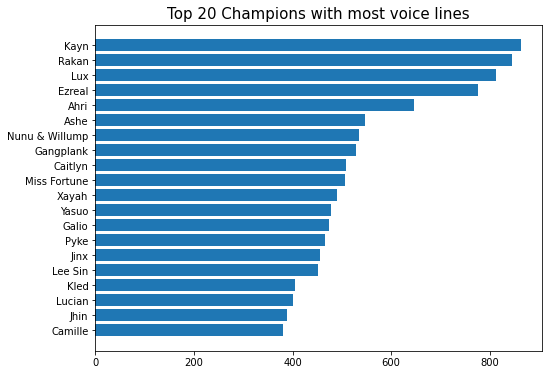

In [22]:
plt.figure(figsize=(8,6))
plt.barh(names_x, values_y)
plt.title('Top 20 Champions with most voice lines', size="15")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

#### __Top 20 most mentioned champions by other champions:__

In [23]:
filter_champs = {
    'Aurelion Sol':'Aurelion',
    'Dr. Mundo':'Mundo',
    'Jarvan IV':'Jarvan',
    'Kayn':'Rhaast',
    "Kog'Maw":"Kog",
    'Nunu & Willump':'Nunu',
    'Renata Glasc':'Renata',
    'Tahm Kench':'Tahm',
    'Twisted Fate':'Twisted',
    'Xin Zhao':'Xin',
}

In [24]:
champ_list = np.array(voices.keys())
filtered_champs = champ_list
filtered_champs = list(map(filter_champs.get, filtered_champs, filtered_champs))

In [25]:
stat_voices = []
for champ in filtered_champs:
    voice_count = voices_df[(voices_df["voice_line"].str.contains(
       f"{champ}[.]|{champ}[,]|{champ}[']|{champ}[!]|{champ}[?]|{champ} ", regex=True))]
    voice_count = voice_count[(voice_count["is_spoken"] == True)&(voice_count["champion"] != "Kayn")&
       (voice_count["champion"] != champ)&(~voice_count["champion"].str.contains(champ))]["voice_line"].count()
    stat_voices.append([champ,voice_count])

In [26]:
table_voices = pd.DataFrame(stat_voices, columns=["champion", "count_voices"]).sort_values("count_voices", ignore_index=True, ascending=False).head(20)
x = np.array(table_voices["champion"])
y = np.array(table_voices["count_voices"])

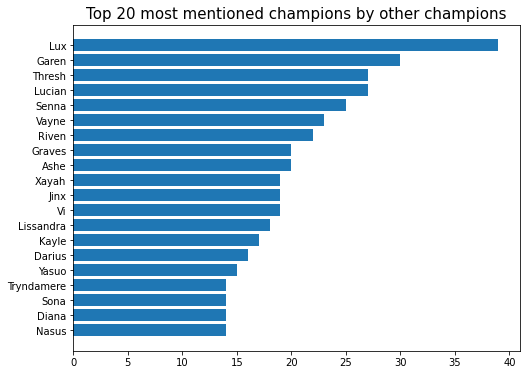

In [27]:
plt.figure(figsize=(8,6))
plt.barh(x, y)
plt.title('Top 20 most mentioned champions by other champions', size="15")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

#### __Distribution of genders:__

In [28]:
male = lol_df["champion"][lol_df["gender"]=="Male"].drop_duplicates().count()
female = lol_df["champion"][lol_df["gender"]=="Female"].drop_duplicates().count()
lgbt = lol_df["champion"][lol_df["gender"]=="LGBTQIA+"].drop_duplicates().count()

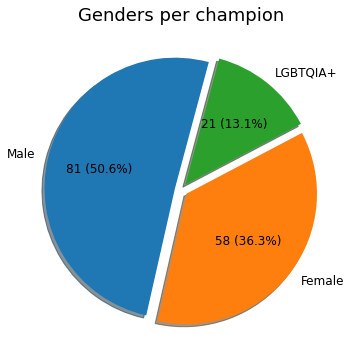

In [29]:
genders = np.array([male, female, lgbt])
labels = ["Male", "Female", "LGBTQIA+"]
explode = [0.05, 0.05, 0.05]
total = sum(genders)

plt.figure(figsize=(8,6))
plt.pie(genders, labels=labels, explode=explode, shadow=True, startangle=75, textprops={'fontsize': 12},
        autopct=lambda p: '{:.0f}'.format(p*total/100) + ' ({:.1f}%)'.format(p))
plt.title("Genders per champion", color="black", size="18")
plt.show()